## Binomial Asset Pricing Model

This is the implementation of a simple slow and fast binomial pricing model in python. We will treat binomial tree as a network of nodes (i, j) with i representing the time steps and h representing the number of ordered price outcome (lowest - or bottom of tree - to highest).



*   binomial_tree_slow
*   binomial_tree_fast



In [2]:
import numpy as np

## Binomial Tree Representation

Stock Tree can be represented using nodes (i, j) and inital stock price S₀

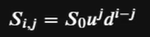


Cᵢ,ⱼ represents the contract price at each node (i, j). Where Cₙ,ⱼ represents the final payoff function that we can define.

In this section I'll attempt to price a European Call, so Cₙ,ⱼ = max(Sₙ,ⱼ - K, 0)

In [3]:
# Initialize Parameters
S0 = 100        # Initial Stock Price
K = 100         # Strike Price
T = 1           # Time to Maturity in Years
r = 0.06        # Annual Risk Free Rate
N = 3           # Number of Time Steps
u = 1.1         # up-factor in binomial models
d = 1/u         # ensure recombining tree
opttype = 'C'   # Option Type Call or Put

## Binomial Tree Slow

Here we use for loops to iterate through nodes j at each time step i.


In [4]:
def binomial_tree_slow(K,T,S0,r,N,u,d,opttype='C'):
    #precompute constants
    dt = T/N
    q = (np.exp(r*dt) - d) / (u-d)
    disc = np.exp(-r*dt)

    # initialise asset prices at maturity - Time step N
    S = np.zeros(N+1)
    S[0] = S0*d**N
    for j in range(1,N+1):
        S[j] = S[j-1]*u/d

    # initialise option values at maturity
    C = np.zeros(N+1)
    for j in range(0,N+1):
        C[j] = max(0, S[j]-K)

    # step backwards through tree
    for i in np.arange(N,0,-1):
        for j in range(0,i):
            C[j] = disc * ( q*C[j+1] + (1-q)*C[j] )

    return C[0]

binomial_tree_slow(K, T, S0, r, N, u, d, opttype='C')

10.145735799928817

## A Fast Binomial Tree

Now we will vectorise out the code using numpy arrays instead of for loops through all j nodes

In [7]:
def binomial_tree_fast(K,T,S0,r,N,u,d,opttype='C'):
    #precompute constants
    dt = T/N
    q = (np.exp(r*dt) - d) / (u-d)
    disc = np.exp(-r*dt)

    # initialise asset prices at maturity - Time step N
    C = S0 * d ** (np.arange(N,-1,-1)) * u ** (np.arange(0,N+1,1))

    # initialise option values at maturity
    C = np.maximum( C - K , np.zeros(N+1) )

    # step backwards through tree
    for i in np.arange(N,0,-1):
        C = disc * ( q * C[1:i+1] + (1-q) * C[0:i] )

    return C[0]

binomial_tree_fast(K,T,S0,r,N,u,d,opttype='C')

10.145735799928826

## Comparing the Speeds of Both

In [11]:
import time
# Timing the functions for different N
for N in [3, 50, 100, 1000, 5000]:
    # Time the slow function
    start_time = time.time()
    binomial_tree_slow(K, T, S0, r, N, u, d, opttype='C')
    slow_time = time.time() - start_time

    # Time the fast function
    start_time = time.time()
    binomial_tree_fast(K, T, S0, r, N, u, d, opttype='C')
    fast_time = time.time() - start_time

    # Print results
    print(f"N={N}: Slow function time = {slow_time:.6f}s, Fast function time = {fast_time:.6f}s")

N=3: Slow function time = 0.000119s, Fast function time = 0.000599s
N=50: Slow function time = 0.001455s, Fast function time = 0.000648s
N=100: Slow function time = 0.004305s, Fast function time = 0.000642s
N=1000: Slow function time = 0.374216s, Fast function time = 0.006777s
N=5000: Slow function time = 9.950016s, Fast function time = 0.055067s
